<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Чтобы при перезапуске ноутбука в случайных процессах сохранялись те же значения (модели показывали те же результаты)`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [1293]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [1294]:
# пропуски


print('В ОБУЧАЮЩЕЙ ВЫБОРКЕ:\n')
print(df_train.isna().sum(), end='\n\n')

misses = df_train.isna().sum().reset_index().rename(columns={'index': 'variable', 0: 'nulls'})
miss_cols = ', '.join(misses[misses.nulls > 0].variable.to_list())
print(f'Пропуски есть в столбах: {miss_cols}\n')

print('В ТЕСТОВОЙ ВЫБОРКЕ:\n')
print(df_test.isna().sum(), end='\n\n')
misses = df_test.isna().sum().reset_index().rename(columns={'index': 'variable', 0: 'nulls'})
miss_cols = ', '.join(misses[misses.nulls > 0].variable.to_list())
print(f'Пропуски есть в столбах: {miss_cols}')

В ОБУЧАЮЩЕЙ ВЫБОРКЕ:

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Пропуски есть в столбах: mileage, engine, max_power, torque, seats

В ТЕСТОВОЙ ВЫБОРКЕ:

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски есть в столбах: mileage, engine, max_power, torque, seats


In [1295]:
# дубликаты

print(f'Кол-во полных дубликатов в обучающей выборке: {df_train.shape[0] - df_train.drop_duplicates().shape[0]} строк')
print(f'Кол-во полных дубликатов в тестовой выборке: {df_test.shape[0] - df_test.drop_duplicates().shape[0]} строк')

Кол-во полных дубликатов в обучающей выборке: 985 строк
Кол-во полных дубликатов в тестовой выборке: 62 строк


In [1296]:
# дашборд в одну строку
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


**Базовые выводы по дашборду:**
```
1. 1% всех ячеек содержит пропуски.

2. Большой процент пропусков в столбцах: mileage (2.9%), engine (2.9%), max_power (2.8%), torque (2.9%), seats (2.9%).

3. Наибольшая корреляция наблюдается между признаками:
    - year и selling_price (0.71)
    - year и km_driven (-0.62)
    - transmission и selling_price (0.59)

4. Автомобили с названием 'Honda Amaze V CVT Petrol BSIV' и 'Lexus ES 300h' встречаются 30 раз в обучающей выборке.

5. В столбце mileage ("пробег"), engine, max_power содержатся в большей степени числовые значения, но есть "выбросы" в виде строк.
```

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [1297]:
# статистики по числовым столбцам

print('Для трейна:\n')
print(df_train.describe(include=np.number))

print('\nДля теста:\n')
print(df_test.describe(include=np.number))


Для трейна:

              year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Для теста:

              year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.00000

In [1298]:
# статистики по категориальным столбцам

print('\t\t\t\tДЛЯ ТРЕЙНА:\n')
print(df_train.describe(include=np.object_))

print('\n\t\t\t\tДЛЯ ТЕСТА:\n')
print(df_test.describe(include=np.object_))

				ДЛЯ ТРЕЙНА:

                          name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468  

				ДЛЯ ТЕСТА:

                       name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manua

In [1299]:
# сравнение медиан

print('\t\t\tСРАВНЕНИЕ СРЕДНЕГО И МЕДИАНЫ В ТРЕЙНЕ:\n')
train_stats = df_train.describe(include=np.number).loc[['mean', '50%']].rename(index={'50%': 'median'}).T
train_stats['diff, %'] = (train_stats['median'] / train_stats['mean'] - 1) * 100
print(train_stats)
print('\nВ столбце year среднее и медиана несильно расходятся (до 1%).\nВ других же - seats, selling_price и km_drive - медиана меньше среднего, а это значит, что имеют правостороннюю асимметрию (большая концентрация значений находится слева).')


print('\n\t\t\tСРАВНЕНИЕ СРЕДНЕГО И МЕДИАНЫ В ТЕСТЕ:\n')
test_stats = df_test.describe(include=np.number).loc[['mean', '50%']].rename(index={'50%': 'median'}).T
test_stats['diff, %'] = (test_stats['median'] / test_stats['mean'] - 1) * 100
print(test_stats)
print('\nВ тестовом датасете наблюдается аналогичная картина.')

print('\n\t\t\tСРАВНЕНИЕ СРЕДНЕГО И МЕДИАНЫ МЕЖДУ ТРЕЙНОМ И ТЕСТОМ:\n')
train_stats.columns = ['mean_train', 'median_train', 'diff_train_%']
test_stats.columns = ['mean_test', 'median_test', 'diff_test_%']
full_stats = pd.concat([train_stats[['mean_train', 'median_train']], test_stats[['mean_test', 'median_test']]], axis=1)
full_stats['mean_diff_%'] = (full_stats['mean_test'] / full_stats['mean_train'] - 1) * 100
full_stats['median_diff_%'] = (full_stats['median_test'] / full_stats['median_train'] - 1) * 100
print(full_stats[['mean_diff_%', 'median_diff_%']])
print('Среднее и медиана в трейне и тесте имеют различия до 4%.')

			СРАВНЕНИЕ СРЕДНЕГО И МЕДИАНЫ В ТРЕЙНЕ:

                        mean    median    diff, %
year             2013.818403    2015.0   0.058674
selling_price  639515.197171  450000.0 -29.634198
km_driven       69584.615517   60000.0 -13.774044
seats               5.419008       5.0  -7.732197

В столбце year среднее и медиана несильно расходятся (до 1%).
В других же - seats, selling_price и km_drive - медиана меньше среднего, а это значит, что имеют правостороннюю асимметрию (большая концентрация значений находится слева).

			СРАВНЕНИЕ СРЕДНЕГО И МЕДИАНЫ В ТЕСТЕ:

                        mean    median    diff, %
year             2013.681000    2014.0   0.015842
selling_price  617901.042000  434999.0 -29.600539
km_driven       71393.341000   61500.0 -13.857512
seats               5.410805       5.0  -7.592313

В тестовом датасете наблюдается аналогичная картина.

			СРАВНЕНИЕ СРЕДНЕГО И МЕДИАНЫ МЕЖДУ ТРЕЙНОМ И ТЕСТОМ:

               mean_diff_%  median_diff_%
year             -0.00682

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [1300]:
# объекты с одинаковым признаковым описанием

print(f'В трейне есть дубликаты: {df_train[df_train.duplicated()].shape[0]} объектов')

В трейне есть дубликаты: 985 объектов


In [1301]:
# отобразите такие объекты
df_train[df_train.duplicated()]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
326             Jaguar XF 2.0 Diesel Portfolio  2017        3200000   
...                                        ...   ...            ...   
6880             Renault Captur 1.5 Diesel RXT  2018        1265000   
6881                  Maruti Ciaz Alpha Diesel  2019        1025000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
326       45000  Diesel      Dealer    Automatic   First Owner  19.33 kmpl   
...         ...     ...         ...          ...           ...         ...   
6880      12000  Diesel  Individual       Manual   First Owner  20.37 kmpl   
6881      32000  Diesel  Individual       Manual   First Owner  28.09 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
326   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
...       ...         ...                  ...    ...  
6880  1461 CC  108.45 bhp       240Nm@ 1750rpm    5.0  
6881  1248 CC   88.50 bhp       200Nm@ 1750rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[985 rows x 13 columns]

In [1302]:
# удалите повторяющиеся строки
df_train.drop_duplicates(subset=df_train.drop(columns=['selling_price']).columns, keep='first', inplace=True)

In [1303]:
# обновить индекс
df_train.reset_index(drop=True, inplace=True)

In [1304]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [1305]:
# посмотри единицы измерения столбца mileage
df_train['mileage'].str.split(' ').str[-1].value_counts()

mileage
kmpl     5577
km/kg      77
Name: count, dtype: int64

In [1306]:
# переведем из km/kg в kmpl, домножив на 1.4
# уберем единицы измерения, переведем во float

def get_correct_mileage(val):
    if val == 'nan':
        return None
    val = val.lower().split(' ')
    if val[1] == 'kmpl':        
        return float(val[0])
    return float(val[0]) * 1.4


df_train['mileage_'] = df_train['mileage'].astype(str).apply(get_correct_mileage)
df_train['mileage_'] = df_train['mileage_'].fillna(df_train['mileage_'].median())

df_test['mileage_'] = df_test['mileage'].astype(str).apply(get_correct_mileage)
df_test['mileage_'] = df_test['mileage_'].fillna(df_train['mileage_'].median())

In [1307]:
# у столбца engine только одна единица измерения ЮХУУ :)
df_train['engine'].str.split(' ').str[-1].value_counts()

engine
CC    5654
Name: count, dtype: int64

In [1308]:
# обрабатываю столбец engine

df_train['engine_'] = df_train['engine'].str.split(' ').str[0].astype(float)
df_train['engine_'] = df_train['engine_'].fillna(df_train['engine_'].median())

df_test['engine_'] = df_test['engine'].str.split(' ').str[0].astype(float)
df_test['engine_'] = df_test['engine_'].fillna(df_train['engine_'].median())

In [1309]:
# обрабатываю столбец max_power

df_train['max_power_'] = df_train['max_power'].str.split(' ').str[0].apply(lambda x: '0' if x == '' else x).astype(float)
df_train['max_power_'] = df_train['max_power_'].fillna(df_train['max_power_'].median())

df_test['max_power_'] = df_test['max_power'].str.split(' ').str[0].apply(lambda x: '0' if x == '' else x).astype(float)
df_test['max_power_'] = df_test['max_power_'].fillna(df_train['max_power_'].median())

In [1310]:
# столбец torque
import re

# пока заполним NaN большим числом, после - заполним медианным
df_train['torque'] = df_train['torque'].fillna('1234567')


def get_clear_torque(val):
    if 'nm' in val.lower() and 'kgm' in val.lower():
        return float(re.search(r'\d+(\.\d+)?', val.lower()).group())
    elif 'nm' in val.lower():  # ньютон-метр
        val = ''.join(val.split(' '))
        if 'nm@rpm' in val.lower():
            return float(re.search(r'\d+(\.\d+)?', val.lower()).group())
        return float(re.search(r'\d+(\.\d+)?', val.lower()).group())
    elif 'kgm' in val.lower():  # килограмм-метр: 1kgm = 9.80665nm
        val = ''.join(val.split(' '))
        if 'kgm@rpm' in val.lower():
            return float(re.search(r'\d+(\.\d+)?', val.lower()).group()) * 9.80665
        return float(re.search(r'\d+(\.\d+)?', val.lower()).group()) * 9.80665
    else:
        return float(re.search(r'\d+(\.\d+)?', val.lower()).group())

def get_max_torque_rpm(val):
    new_val = float(re.search(r'\d+(\.\d+)?(?!.*\d)', val).group())
    if new_val < 6:
        return new_val * 1000
    return new_val


df_train['torque_'] = df_train['torque'].apply(get_clear_torque)
df_train.loc[df_train.torque_ == 1234567, 'torque_'] = df_train[df_train.torque_ != 1234567]['torque_'].median()  # заменяем обратно пропуски на медианное значение

df_train['max_torque_rpm'] = df_train['torque'].apply(get_max_torque_rpm)
df_train.loc[df_train.max_torque_rpm == 1234567.0, 'max_torque_rpm'] = df_train[df_train.max_torque_rpm != 1234567.0]['max_torque_rpm'].median()



# похоже делаем для теста, но тут мы NaN заполним уже медианным значением из трейна
df_test['torque_'] = df_test['torque'].fillna(str(df_train.torque_.median())).apply(get_clear_torque)

df_test['max_torque_rpm'] = df_test['torque'].fillna(str(df_train.max_torque_rpm.median())).apply(get_max_torque_rpm)

In [1311]:
# оставляем только обработанные столбцы, старые удаляем
df_train = df_train.drop(columns=['mileage', 'engine', 'max_power', 'torque'])
df_train.rename(columns={'mileage_': 'mileage', 'engine_': 'engine', 'max_power_': 'max_power', 'torque_': 'torque'}, inplace=True)
df_test = df_test.drop(columns=['mileage', 'engine', 'max_power', 'torque'])
df_test.rename(columns={'mileage_': 'mileage', 'engine_': 'engine', 'max_power_': 'max_power', 'torque_': 'torque'}, inplace=True)

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






```
1. Стоит применять именно медиану, потому что она:
    - менее чувствительная к выбросам;
    - при асимметричном распределении среднее может смещаться в сторону длинного хвоста;
2. Можно применять и среднее, если распределение близко к нормальному и нет выбросов.
3. Медиану правильно считать по тренировочным данным для train и test, поскольку иначе мы подсматриваем в данные, на которых хотим проверить нашу модель.
```

In [1312]:
# дозаполняем пропуски (где-то я уже заполнил :))
df_train.seats = df_train.seats.fillna(df_train.seats.median())
df_test.seats = df_test.seats.fillna(df_train.seats.median())

In [1313]:
df_train.isna().sum(), df_test.isna().sum()

(name              0
 year              0
 selling_price     0
 km_driven         0
 fuel              0
 seller_type       0
 transmission      0
 owner             0
 seats             0
 mileage           0
 engine            0
 max_power         0
 torque            0
 max_torque_rpm    0
 dtype: int64,
 name              0
 year              0
 selling_price     0
 km_driven         0
 fuel              0
 seller_type       0
 transmission      0
 owner             0
 seats             0
 mileage           0
 engine            0
 max_power         0
 torque            0
 max_torque_rpm    0
 dtype: int64)

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [1314]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [1315]:
df_train['seats'].nunique()

9

In [1316]:
df_train['seats'].describe()

count    5840.000000
mean        5.426712
std         0.982344
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

`Мы можем рассмотреть seats как категориальную переменную, так как кол-во возможных ее значений ограничено - всего 9. В таком случае мы бы создали отдельные столбцы "2", "3", "4", ..., "14" - обозначающие кол-во мест`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [1317]:
df_train.describe()

year  selling_price     km_driven        seats      mileage  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04     5.426712    19.547135   
std       4.095622   5.354320e+05  6.007114e+04     0.982344     4.228290   
min    1983.000000   2.999900e+04  1.000000e+00     2.000000     0.000000   
25%    2011.000000   2.500000e+05  3.900000e+04     5.000000    17.000000   
50%    2014.000000   4.050000e+05  7.000000e+04     5.000000    19.400000   
75%    2017.000000   6.400000e+05  1.000000e+05     5.000000    22.320000   
max    2020.000000   1.000000e+07  2.360457e+06    14.000000    46.816000   

            engine    max_power       torque  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean   1429.448973    87.892354   175.357443     2902.946575  
std     485.662834    31.661223   107.145160     1038.348637  
min     624.000000     0.000000    47.071920        0.000000  
25%    1197.000000    68.000000   111.800000     2000.000000  
50%    1248.000000    81.860000   160.000000     2800.000000  
75%    1498.000000    99.000000   200.055660     3750.000000  
max    3604.000000   400.000000  1863.263500     5300.000000

In [1318]:
# для сравнения распределений построил новый дашборд
# profile2 = ProfileReport(df_train, title="Profiling Report")
# profile2.to_file('hw1_ml_ydata_profile2.html')

```
Заполнение пропусков не изменило значительно распределения наших переменных.
Медиана числовых столбцов year, selling_price сдвинулись левее, а столбцов km_driven - наоборот, правее. 
Средние же km_driven и selling_price сдвинулись в противоположном направлении.
У переменной seats изменений не произошло значительных.

Это могло произойти, если:
- пропуски составляют бОльшую часть данных;
- пропуски неоднородно распределены, в таком случае заполнение этих пропусков могло кардинально изменить формы распределений;
- пропуски неслучайны, а связаны с какой-то переменной;
- метод заполнения пропусков выбран специфичный.
```

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [1319]:
# список числовых признаков
num_cols = ['year', 'selling_price', 'km_driven', 'seats', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']

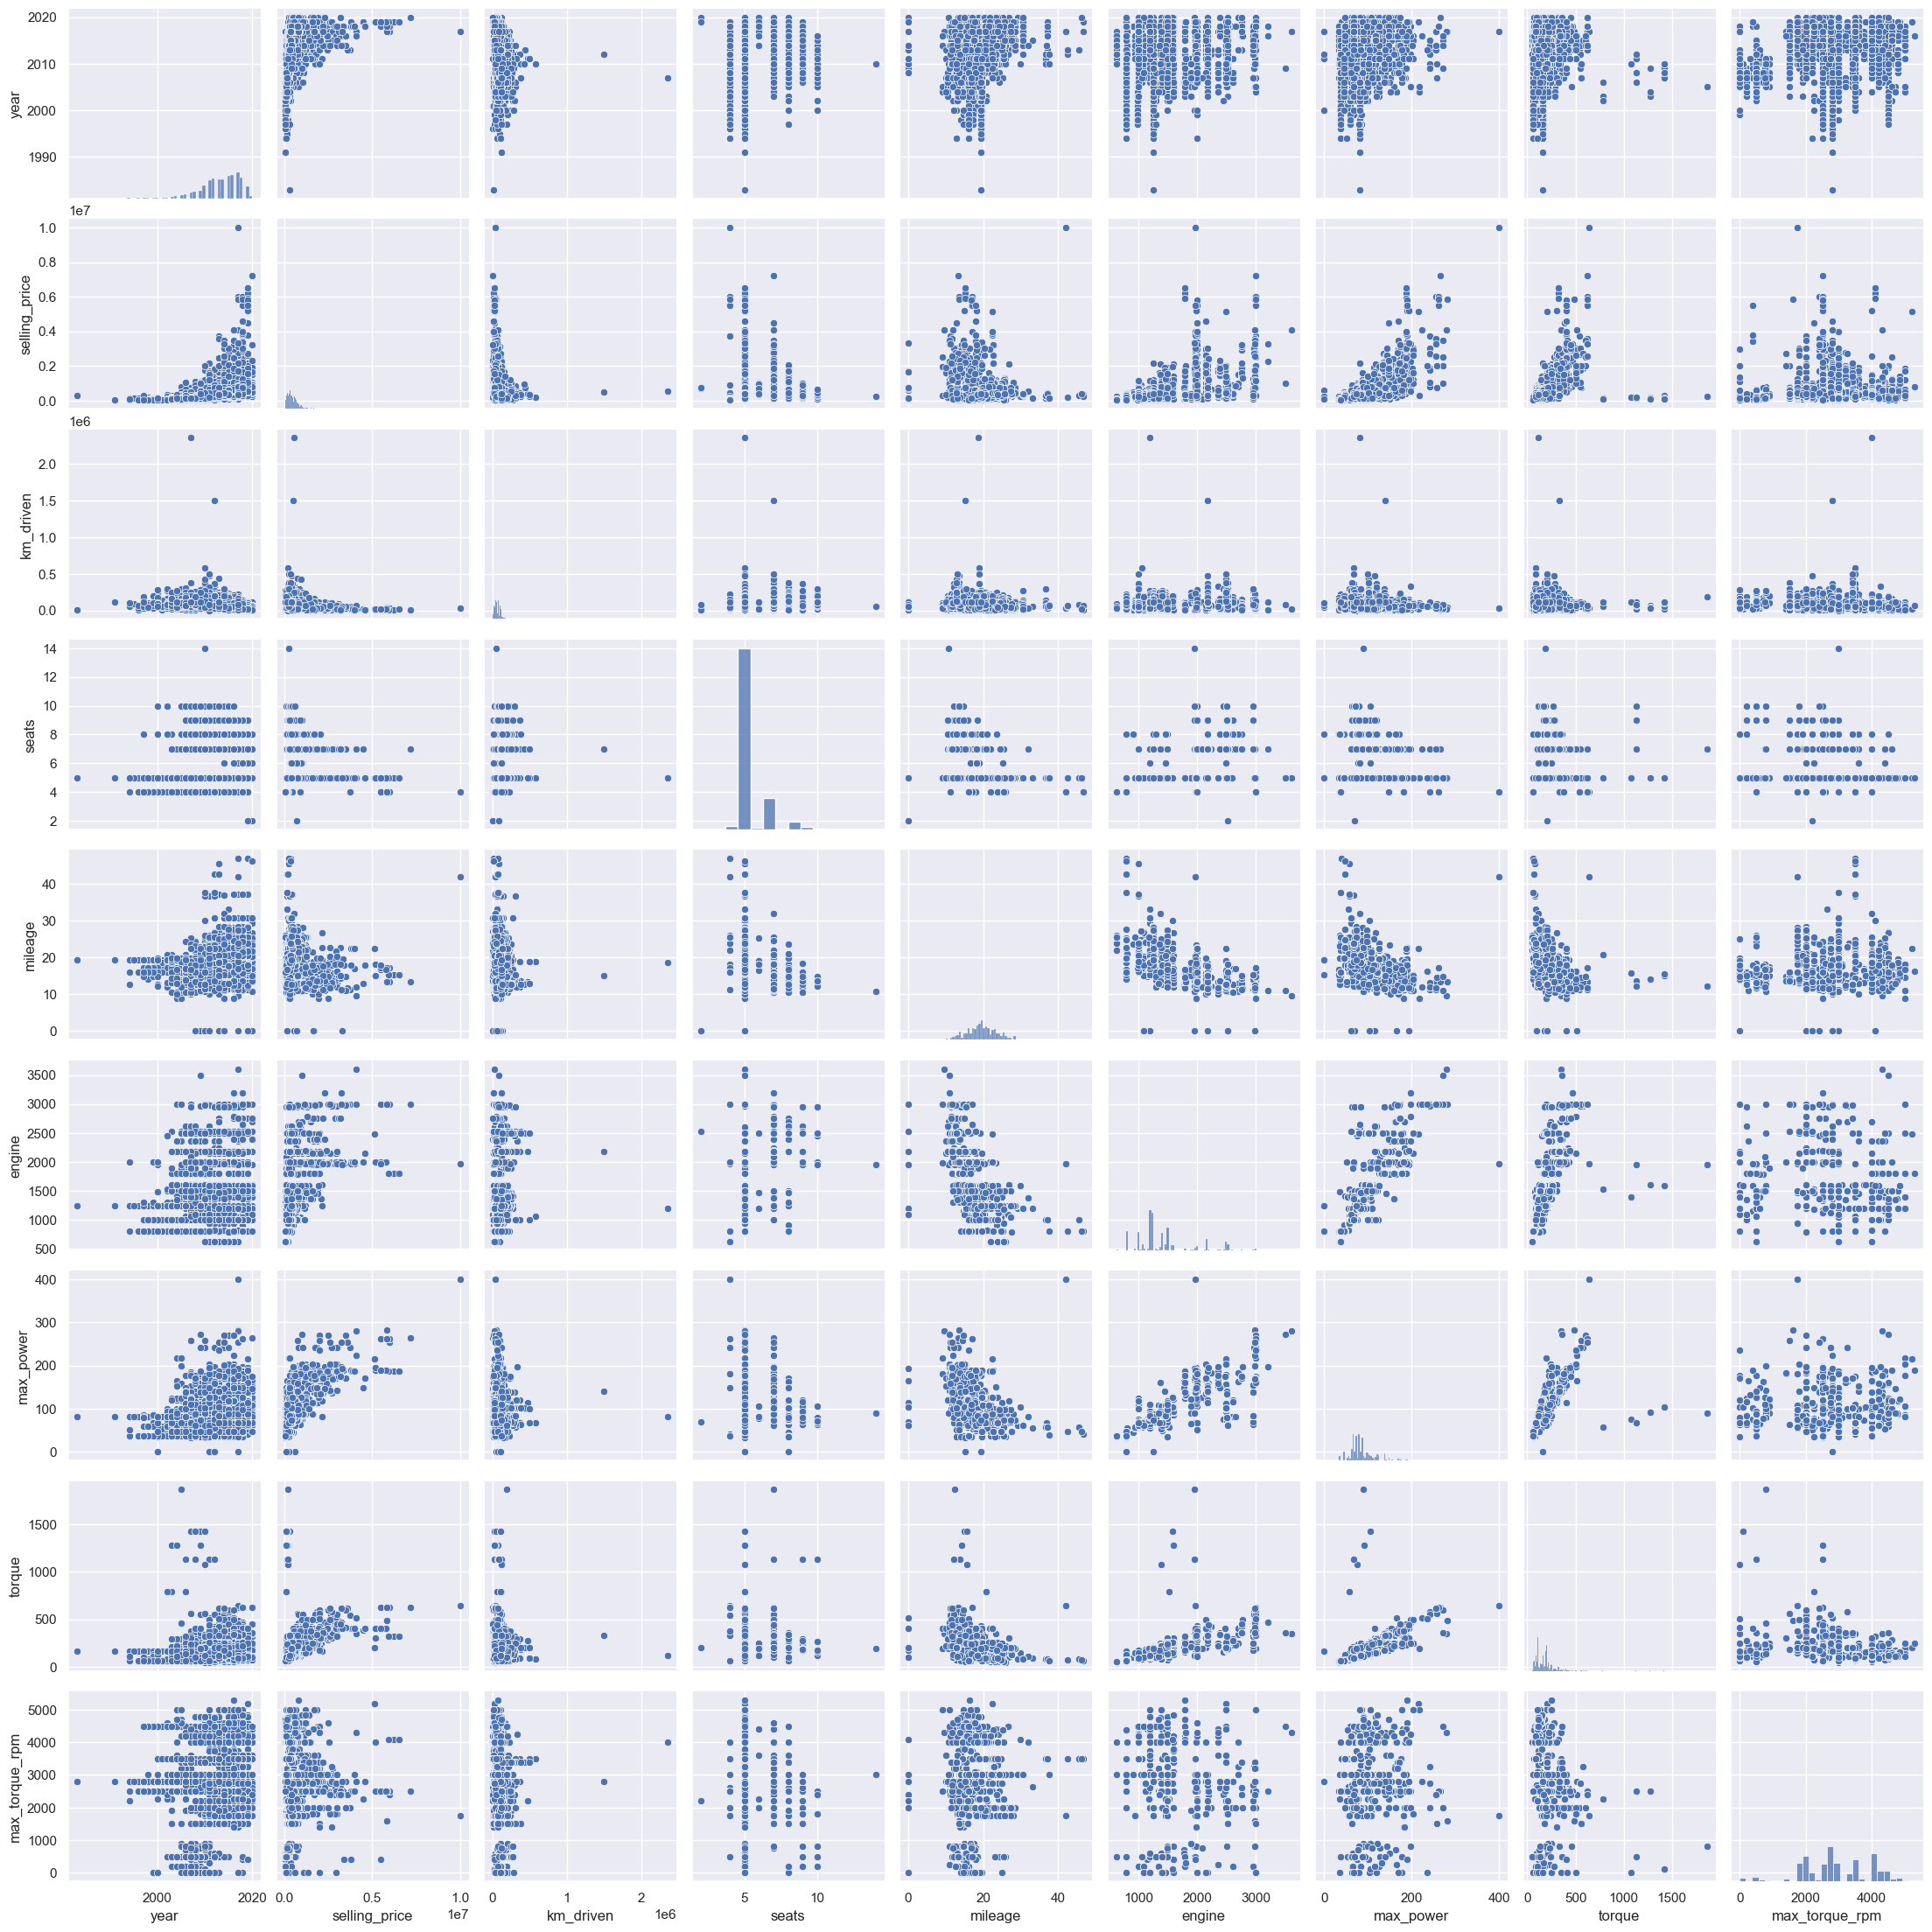

In [1320]:
# pairplot числовых признаков
sns.set()
sns.pairplot(df_train[num_cols])

`По данному pairplot'у наблюдается зависимость целевой переменной (selling_price) от переменных year и max_power, а также от переменных torque и engine.`

```
По графикам предполагаю, что есть связь между признаками:
- max_power и torque
- max_power и engine
- engine и mileage
```

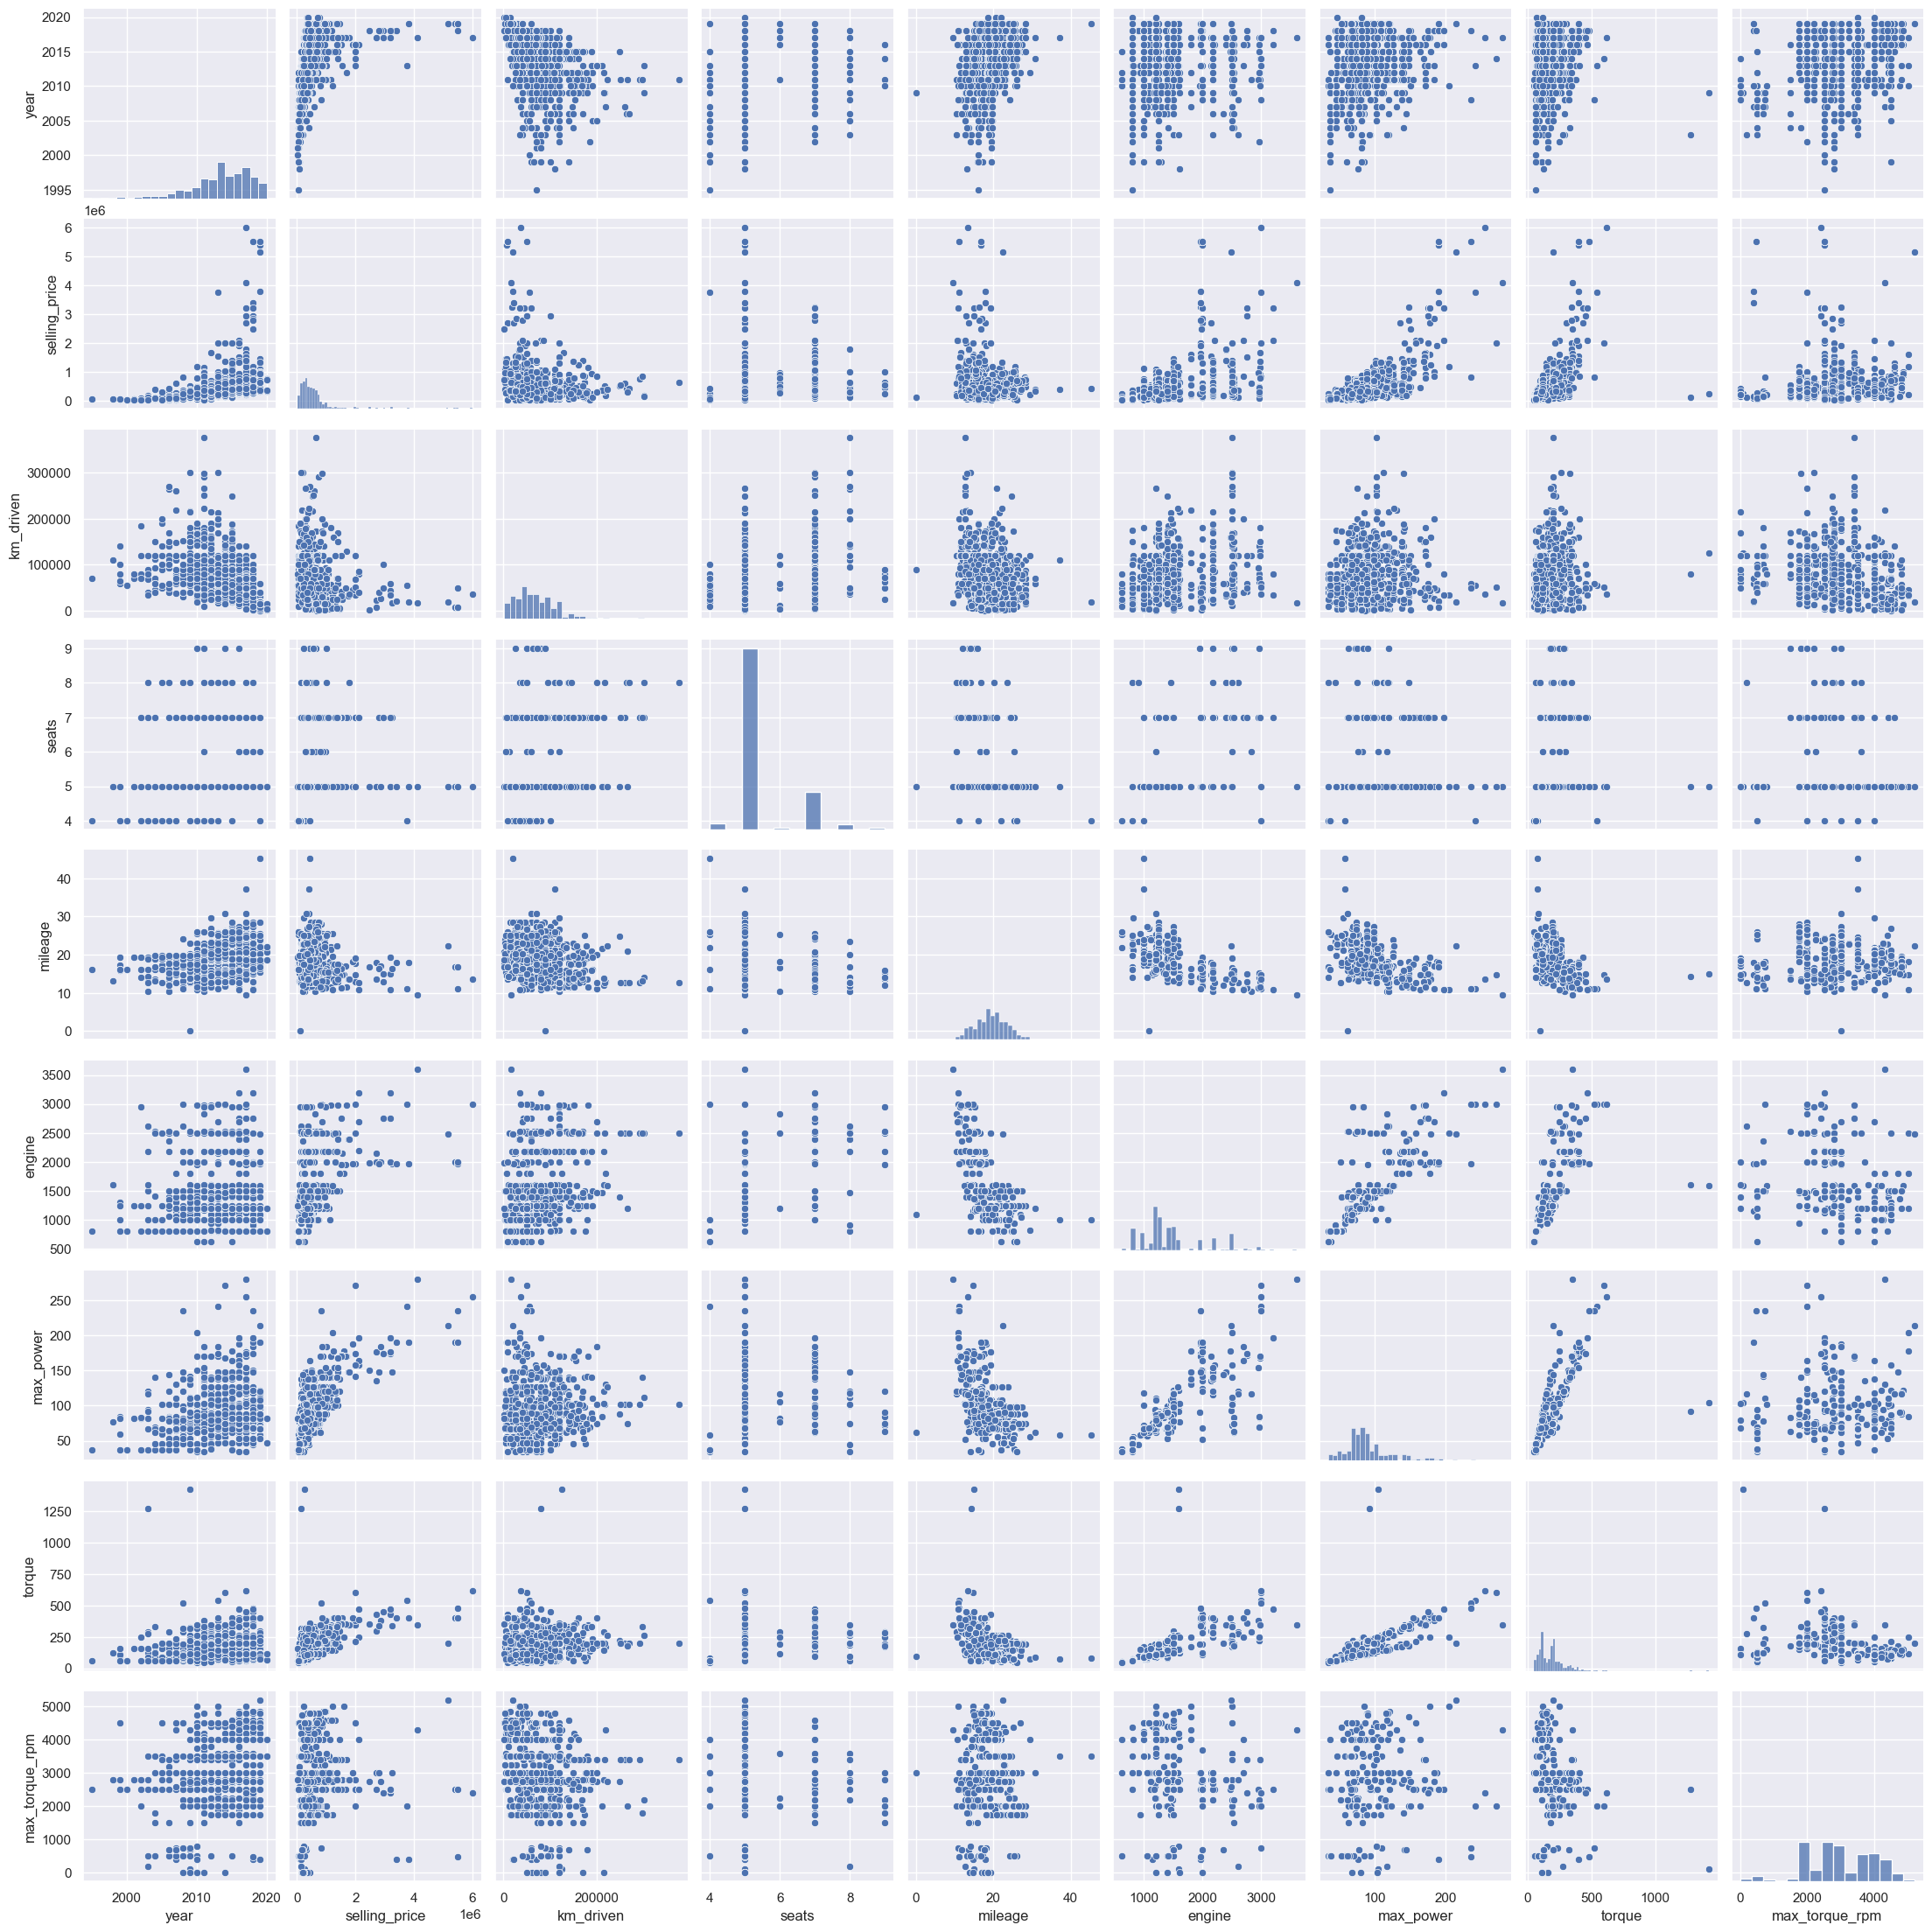

In [1321]:
# pairplot по тестовым данным
sns.pairplot(df_test[num_cols])

`Выборки похожи: также наблюдается связь целевой переменной с вышеуказанными переменными, а также наблюдаются те же связи между признаками.`

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [1322]:
# корреляция Пирсона
df_train[num_cols].corr()

year  selling_price  km_driven     seats   mileage  \
year            1.000000       0.427279  -0.368966  0.041178  0.322860   
selling_price   0.427279       1.000000  -0.164828  0.149953 -0.111323   
km_driven      -0.368966      -0.164828   1.000000  0.192328 -0.171749   
seats           0.041178       0.149953   0.192328  1.000000 -0.436971   
mileage         0.322860      -0.111323  -0.171749 -0.436971  1.000000   
engine          0.002819       0.447672   0.229766  0.652172 -0.561690   
max_power       0.158207       0.692725   0.024379  0.242791 -0.375950   
torque          0.053151       0.466466   0.112956  0.316274 -0.247664   
max_torque_rpm  0.216013      -0.007473  -0.232963 -0.148002 -0.045020   

                  engine  max_power    torque  max_torque_rpm  
year            0.002819   0.158207  0.053151        0.216013  
selling_price   0.447672   0.692725  0.466466       -0.007473  
km_driven       0.229766   0.024379  0.112956       -0.232963  
seats           0.652172   0.242791  0.316274       -0.148002  
mileage        -0.561690  -0.375950 -0.247664       -0.045020  
engine          1.000000   0.681247  0.600069       -0.220920  
max_power       0.681247   1.000000  0.659597       -0.010699  
torque          0.600069   0.659597  1.000000       -0.337974  
max_torque_rpm -0.220920  -0.010699 -0.337974        1.000000

<Axes: >

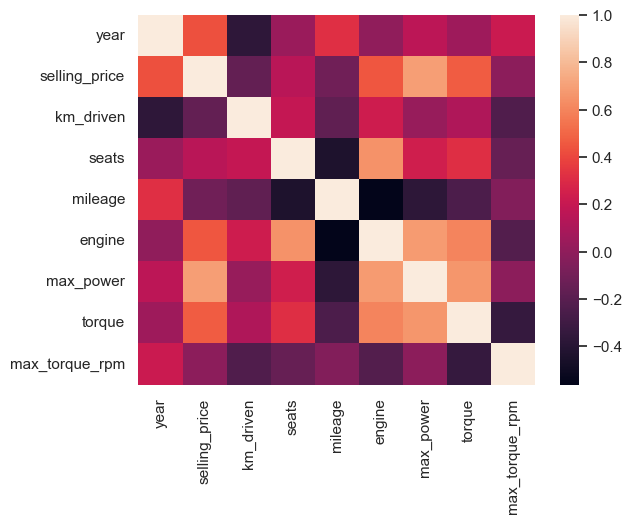

In [1323]:
# тепловая карта
sns.heatmap(df_train[num_cols].corr())

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

```
1. Наименее скоррелированы между собой признаки: year и engine
2. Наблюдается сильная положительная линейная зависимость между: max_power и selling_price (0.692725); сильная линейная связь между признаками engine и max_power (0.681247).
3. Утверждение "чем меньше год, тем больше километров проехала машина" - скорее верное, так как между данными признаками существует отрицательная линейная зависимость (-0.368966).
```

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [1324]:
# моя реализация
def spearman_corr(df):
    cols = df.columns
    pivot_table = pd.DataFrame()
    for x in cols:
        for y in cols:
            if x != y:
                temp = df[[x, y]].sort_values(by=x).reset_index(drop=True)
                n = temp.shape[0]
                temp['rank_x'] = temp.index + 1
                temp = temp.sort_values(by=y).reset_index(drop=True)
                temp['rank_y'] = temp.index + 1
                temp['rank_diff_squared'] = (temp['rank_x'] - temp['rank_y']) ** 2
                r = 1 - (6 * temp['rank_diff_squared'].sum()) / (n * (n**2 - 1))
                pivot_table = pd.concat([pivot_table, pd.DataFrame([x, y, r]).T], axis=0)
            else:
                pivot_table = pd.concat([pivot_table, pd.DataFrame([x, y, 1]).T], axis=0)
    pivot_table.columns = ['column_x', 'column_y', 'spearman_corr']
    return pivot_table

pd.pivot_table(data=spearman_corr(df_train[num_cols]), values='spearman_corr', index='column_x', columns='column_y')

column_y          engine km_driven max_power max_torque_rpm   mileage  \
column_x                                                                
engine               1.0   0.30132  0.711344      -0.365682 -0.437718   
km_driven       0.298882       1.0  0.040063      -0.347445 -0.195264   
max_power       0.701264  0.038296       1.0      -0.025467 -0.318674   
max_torque_rpm -0.364933 -0.352461 -0.026251            1.0 -0.090709   
mileage        -0.444003 -0.196763 -0.317723      -0.098171       1.0   
seats           0.332484  0.101305  0.199013      -0.091602 -0.309865   
selling_price   0.458253 -0.294935  0.612547      -0.018886  0.016991   
torque           0.83637  0.239429   0.77877      -0.475244 -0.175048   
year            -0.04584 -0.564846  0.166875       0.180881  0.336861   

column_y           seats selling_price    torque      year  
column_x                                                    
engine          0.043038      0.461564  0.837903 -0.044156  
km_driven      -0.230347     -0.296431  0.238205 -0.568084  
max_power      -0.124707      0.611464  0.776379  0.158449  
max_torque_rpm -0.502877      -0.02075 -0.473308  0.176973  
mileage        -0.611735      0.016912 -0.174405  0.329101  
seats                1.0      0.220523  0.283229  0.042144  
selling_price  -0.133449           1.0  0.581627  0.694516  
torque         -0.030686      0.581125       1.0  0.096161  
year           -0.346569       0.70443   0.10396       1.0

In [1325]:
# as is
df_train[num_cols].corr(method='spearman')

year  selling_price  km_driven     seats   mileage  \
year            1.000000       0.707123  -0.569659  0.048291  0.340316   
selling_price   0.707123       1.000000  -0.295665  0.317605  0.017140   
km_driven      -0.569659      -0.295665   1.000000  0.195317 -0.195916   
seats           0.048291       0.317605   0.195317  1.000000 -0.437778   
mileage         0.340316       0.017140  -0.195916 -0.437778  1.000000   
engine         -0.038056       0.463577   0.304504  0.527716 -0.438473   
max_power       0.166267       0.612600   0.040655  0.304095 -0.318462   
torque          0.102610       0.582409   0.242914  0.438209 -0.174338   
max_torque_rpm  0.186048      -0.020952  -0.350073 -0.150705 -0.091761   

                  engine  max_power    torque  max_torque_rpm  
year           -0.038056   0.166267  0.102610        0.186048  
selling_price   0.463577   0.612600  0.582409       -0.020952  
km_driven       0.304504   0.040655  0.242914       -0.350073  
seats           0.527716   0.304095  0.438209       -0.150705  
mileage        -0.438473  -0.318462 -0.174338       -0.091761  
engine          1.000000   0.713435  0.842425       -0.367548  
max_power       0.713435   1.000000  0.779422       -0.024648  
torque          0.842425   0.779422  1.000000       -0.474830  
max_torque_rpm -0.367548  -0.024648 -0.474830        1.000000

`Результаты совпадают c точностью до 2 знака`

In [1326]:
# матрица корреляции phik

import phik
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']
df_train[num_cols + cat_cols].phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'seats', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']


year  selling_price  km_driven     seats   mileage  \
year            1.000000       0.219841   0.081574  0.288178  0.277748   
selling_price   0.219841       1.000000   0.000000  0.196447  0.448047   
km_driven       0.081574       0.000000   1.000000  0.096223  0.181072   
seats           0.288178       0.196447   0.096223  1.000000  0.523230   
mileage         0.277748       0.448047   0.181072  0.523230  1.000000   
engine          0.213156       0.503682   0.210747  0.603400  0.661967   
max_power       0.388533       0.872166   0.000000  0.568452  0.530364   
torque          0.185089       0.687135   0.000000  0.365282  0.294369   
max_torque_rpm  0.361908       0.167217   0.121607  0.370101  0.584067   
fuel            0.205834       0.157885   0.046285  0.450714  0.639258   
seller_type     0.232412       0.334505   0.000000  0.032173  0.062066   
transmission    0.153714       0.463058   0.012824  0.045734  0.241317   
owner           0.418636       0.557641   0.087887  0.046741  0.211813   

                  engine  max_power    torque  max_torque_rpm      fuel  \
year            0.213156   0.388533  0.185089        0.361908  0.205834   
selling_price   0.503682   0.872166  0.687135        0.167217  0.157885   
km_driven       0.210747   0.000000  0.000000        0.121607  0.046285   
seats           0.603400   0.568452  0.365282        0.370101  0.450714   
mileage         0.661967   0.530364  0.294369        0.584067  0.639258   
engine          1.000000   0.721079  0.611920        0.743764  0.644421   
max_power       0.721079   1.000000  0.825306        0.415458  0.236798   
torque          0.611920   0.825306  1.000000        0.397872  0.349334   
max_torque_rpm  0.743764   0.415458  0.397872        1.000000  0.648464   
fuel            0.644421   0.236798  0.349334        0.648464  1.000000   
seller_type     0.160346   0.331959  0.147800        0.118346  0.050771   
transmission    0.520161   0.511888  0.362304        0.158005  0.053721   
owner           0.186011   0.121828  0.059774        0.261189  0.030943   

                seller_type  transmission     owner  
year               0.232412      0.153714  0.418636  
selling_price      0.334505      0.463058  0.557641  
km_driven          0.000000      0.012824  0.087887  
seats              0.032173      0.045734  0.046741  
mileage            0.062066      0.241317  0.211813  
engine             0.160346      0.520161  0.186011  
max_power          0.331959      0.511888  0.121828  
torque             0.147800      0.362304  0.059774  
max_torque_rpm     0.118346      0.158005  0.261189  
fuel               0.050771      0.053721  0.030943  
seller_type        1.000000      0.127968  0.176612  
transmission       0.127968      1.000000  0.096990  
owner              0.176612      0.096990  1.000000

```
Выводы:
1. Между категориальными переменными практически отсутствует зависимость.
2. Самая сильная зависимость между категориальными переменными наблюдается между owner и seller_type (0.176612)
```

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

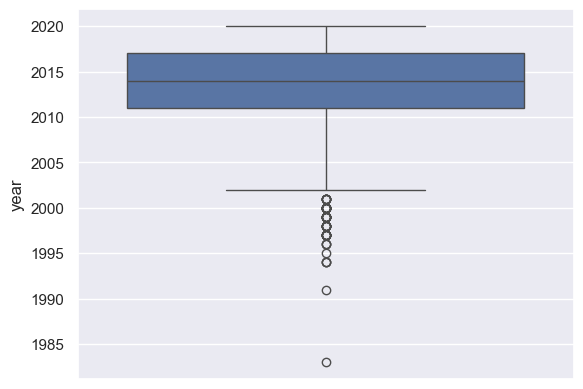

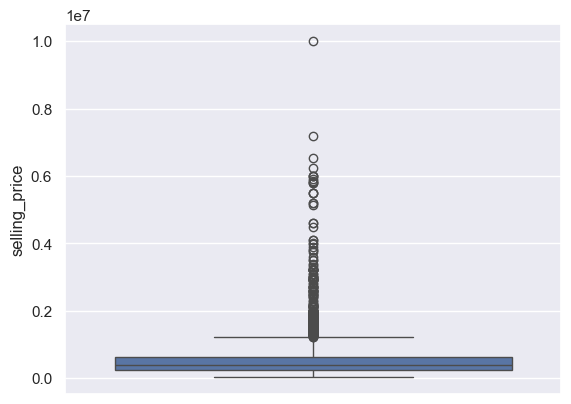

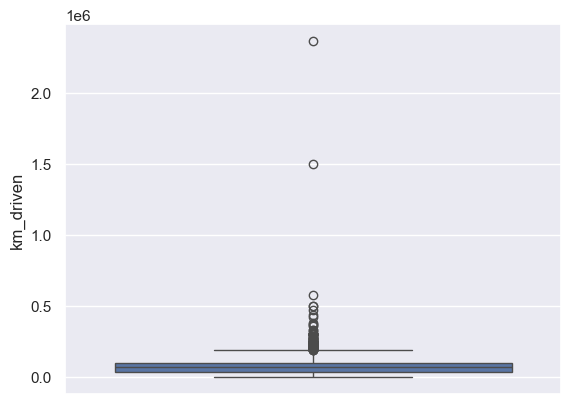

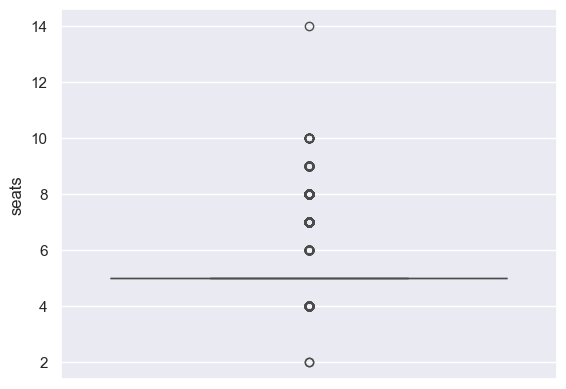

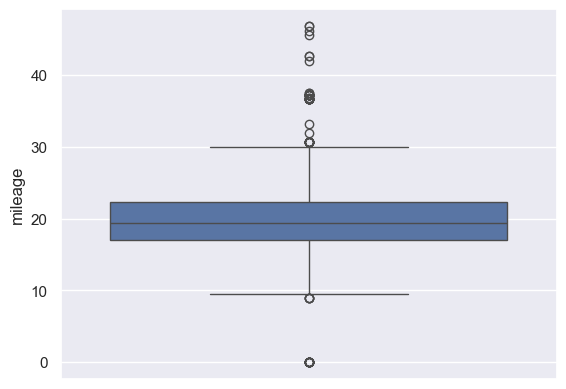

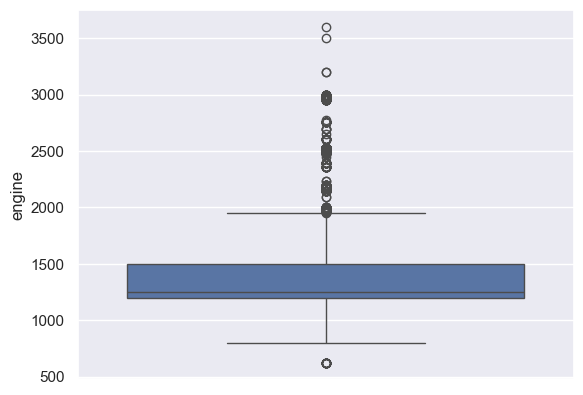

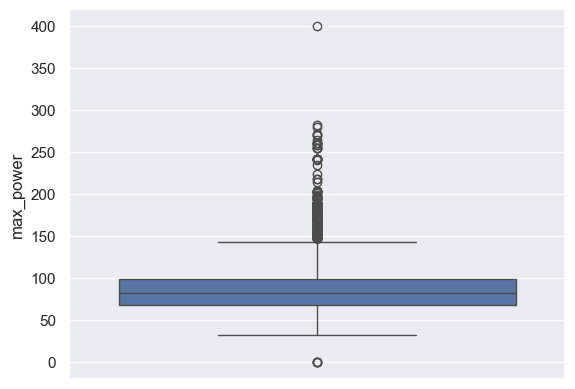

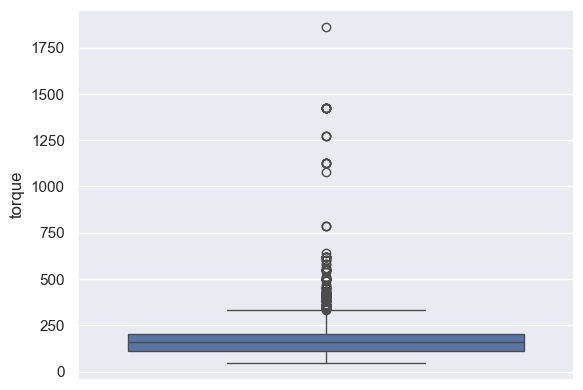

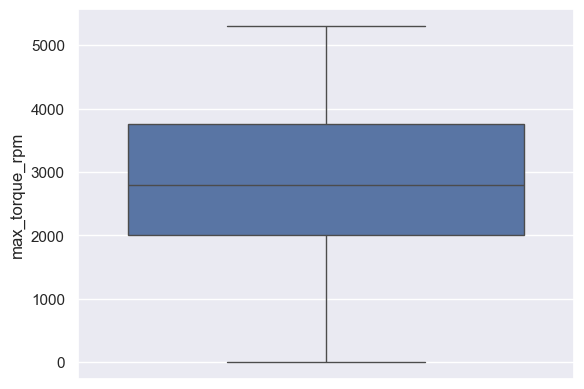

In [1327]:
# мы не рассмотрели наличие выбросово в числовых признаках

for col in num_cols:
    sns.boxplot(df_train[col])
    plt.show()

`Выбросы наблюдаются практически в каждой числовой переменной!`

`Рассмотрим более подробно нашу целевую переменную - selling_price`

In [1328]:
# посчитаем межквартильный размах и значение выбросов
IQR = df_train['selling_price'].quantile(0.75) - df_train['selling_price'].quantile(0.25)
maximum = df_train['selling_price'].quantile(0.75) + 1.5 * IQR
print(f'Кол-во объектов с "ценой-выбросом": {df_train[df_train.selling_price > maximum].shape[0]}, что составляет {round(df_train[df_train.selling_price > maximum].shape[0] / df_train.shape[0] * 100)}% всех объектов.')

Кол-во объектов с "ценой-выбросом": 287, что составляет 5% всех объектов.


# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [1329]:
y_train = df_train['selling_price']
X_train = df_train[num_cols].drop(columns=['selling_price'])

In [1330]:
assert X_train.shape == (5840, 8)  # поправил кол-во столбцов: с 6 на 8, как будто была опечатка

In [1331]:
y_test = df_test['selling_price']
X_test = df_test[num_cols].drop(columns=['selling_price'])

In [1332]:
assert X_test.shape == (1000, 8)  # поправил как и верхний ассерт

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [1333]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print(f'MSE = {MSE(y_test, pred)}')
print(f'R2 = {r2_score(y_test, pred)}')
print(f'business_metrics = {business_metrics(y_test, pred)}')
print(f'my_business_metrics = {my_business_metrics(y_test, pred)}')

MSE = 230271447121.98438
R2 = 0.5994084760346866
business_metrics = 0.238
my_business_metrics = 0.176


`Получили хороший коэффициент детерминации (R2) - 0.6, но огромный MSE - 23e10, RMSE составляет около 500 тыс рублей...`

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

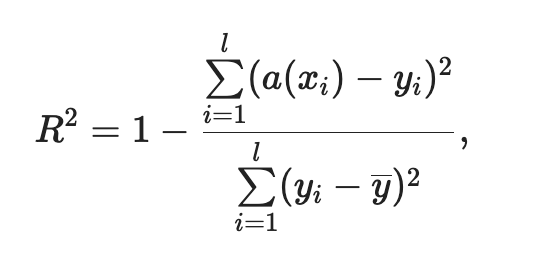

`где:`
- `числитель - квадратичная ошибка`
- `знаменатель - дисперсия целевой переменной (без деления на кол-во объектов)`
- $\overline y$` - среднее значение целевой переменной`

In [1334]:
def R2(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    sq_diffs = np.sum((y_pred - y_true) ** 2)
    y_mean = np.mean(y_true)
    dispers = np.sum((y_true - y_mean) ** 2)
    r2 = 1 - sq_diffs / dispers
    return r2

R2(y_test, pred)

0.5994084760346866

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

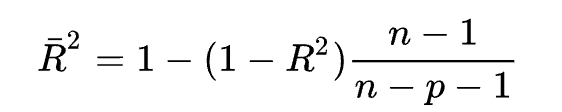

```
где:
- R2 - коэфициент детерминации
- n - количество наблюдений
- p - количество независимых переменных
```

In [1335]:
def R2_adj(y_true, y_pred, n, p):
    return 1 - (1 - R2(y_true, y_pred)) * ((n - 1) / (n - p - 1))


R2_adj(y_test, pred, n=X_train.shape[0], p=X_train.shape[1])

0.5988588735322475

`Применяется когда необходимо сравнить модели с разным числом переменных так, чтобы число регрессоров не влияло на коэффициент детерминации.`

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [1336]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

print(f'MSE = {MSE(y_test, pred)}')
print(f'RMSE = {MSE(y_test, pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, pred)}')
print(f'business_metrics = {business_metrics(y_test, pred)}')
print(f'my_business_metrics = {my_business_metrics(y_test, pred)}')

MSE = 230271447121.98407
RMSE = 479866.07206801366
R2 = 0.5994084760346872
business_metrics = 0.238
my_business_metrics = 0.176


`Модель показала такие же результаты, как и предыдущая модель: улучшение стало незначительным - на 1^(-10).`

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [1337]:
pd.DataFrame(model.coef_, columns=['coef'], index=X_train.columns).abs().sort_values(by='coef', ascending=False)

coef
max_power       326628.578171
year            164869.126282
km_driven        47340.649246
max_torque_rpm   39974.369937
engine           38051.792794
seats            23652.898561
mileage          12328.761423
torque            5071.069552

`Наболее информативный признак в предсказании цены - max_power.`

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [1338]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_scaled, y_train)
pred = lasso.predict(X_test_scaled)

print(f'MSE = {MSE(y_test, pred)}')
print(f'RMSE = {MSE(y_test, pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, pred)}')
print(f'business_metrics = {business_metrics(y_test, pred)}')
print(f'my_business_metrics = {my_business_metrics(y_test, pred)}')

MSE = 230272166261.19305
RMSE = 479866.8213798419
R2 = 0.5994072249847837
business_metrics = 0.238
my_business_metrics = 0.176


`Метрики качества изменились незначительно.`

In [1339]:
pd.DataFrame(lasso.coef_, columns=['coef'], index=X_train.columns).abs().sort_values(by='coef', ascending=False)

coef
max_power       326629.233402
year            164868.577805
km_driven        47339.507617
max_torque_rpm   39973.530639
engine           38047.737596
seats            23650.108014
mileage          12327.405525
torque            5071.045172

`Ни один из весов не занулился. Это произошло в виду низкого значения гиперпараметра alpha по умолчанию в Lasso (=1.0).` 

`При увеличении данного гиперпараметра до определенного уровня некоторые веса начнут зануляться.`

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [1340]:
from time import time
from sklearn.model_selection import GridSearchCV


parameters = {
    'alpha': [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10_000, 50_000, 100_000],
    'fit_intercept': [True, False]
}

lasso = Lasso()

t1 = time()
setka = GridSearchCV(lasso, parameters, n_jobs=-1, verbose=True, cv=10, scoring=['neg_root_mean_squared_error', 'r2'], refit='neg_root_mean_squared_error')
setka.fit(X_train_scaled, y_train)
t2 = time()



Fitting 10 folds for each of 20 candidates, totalling 200 fits


```
Параметры, которые я заполнял для поиска по сетке:
- alpha - коэффициент регуляризации, определяющий силу регуляризации (принимает значения от нуля до +бесконечности)
- fit_intercept - добавлять ли в модель свободный член (он же "интерсепт")
```

`Грид-серч обучил 20 моделей`

In [1341]:
# оптимальные гиперпараметры
setka.best_params_

{'alpha': 10000, 'fit_intercept': True}

In [1342]:
# посмотрим зануляются ли веса при такой регуляризации

model = Lasso(**setka.best_params_).fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print(f'MSE = {MSE(y_test, pred)}')
print(f'RMSE = {MSE(y_test, pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, pred)}')
print(f'business_metrics = {business_metrics(y_test, pred)}')
print(f'my_business_metrics = {my_business_metrics(y_test, pred)}')

pd.DataFrame(setka.best_estimator_.coef_, columns=['coef'], index=X_train.columns).abs().sort_values(by='coef', ascending=False)

MSE = 237965838560.51535
RMSE = 487817.4233875983
R2 = 0.586022934618803
business_metrics = 0.235
my_business_metrics = 0.174


coef
max_power       331929.693490
year            159582.266989
km_driven        35629.259655
max_torque_rpm   31240.233488
torque            4915.537810
engine            1450.192106
seats                0.000000
mileage              0.000000

`В данном случае у двух параметров веса зануляются: seats и mileage`

In [1343]:
# топ-5 моделей
# pd.DataFrame(setka.cv_results_).sort_values(by='rank_test_neg_root_mean_squared_error').head(5)

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [1344]:
from sklearn.linear_model import ElasticNet

parameters = {
    'alpha': [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10_000, 50_000, 100_000],
    'l1_ratio': [0.01, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'fit_intercept': [True, False]
}

model = ElasticNet()

t1 = time()
setka = GridSearchCV(model, parameters, n_jobs=-1, verbose=True, cv=10, scoring=['neg_root_mean_squared_error', 'r2'], refit='neg_root_mean_squared_error')
setka.fit(X_train_scaled, y_train)
t2 = time()


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


`Грид-серч обучил 180 моделей`

In [1345]:
# оптимальные гиперпараметры
setka.best_params_

{'alpha': 0.5, 'fit_intercept': True, 'l1_ratio': 0.9}

In [1346]:
model = ElasticNet(**setka.best_params_).fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print(f'MSE = {MSE(y_test, pred)}')
print(f'RMSE = {MSE(y_test, pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, pred)}')
print(f'business_metrics = {business_metrics(y_test, pred)}')
print(f'my_business_metrics = {my_business_metrics(y_test, pred)}')

MSE = 237077530501.75272
RMSE = 486906.0797543534
R2 = 0.5875682789654769
business_metrics = 0.244
my_business_metrics = 0.182


`Данная модель показала наилучший результат по метрике RMSE`

In [1347]:
# pd.DataFrame(setka.cv_results_)[['params', 'mean_test_neg_root_mean_squared_error', 'rank_test_neg_root_mean_squared_error', 'mean_test_r2', 'rank_test_r2']].sort_values(by='rank_test_neg_root_mean_squared_error').head()

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [1348]:
def l0_regularization(X_train, y_train, X_test, y_test, alpha=1):
    # здесь alpha - коэффициент регуляризации (количество нулевых весов)

    zeros = 0
    model = LinearRegression()
    model.fit(X_train, y_train)

    new_coefs = {f'x{i+1}':model.coef_[i] for i in range(len(list(model.coef_.copy())))}
    new_coefs = dict(sorted(new_coefs.items(), key=lambda item: abs(item[1])))
    # print(new_coefs)

    for key in new_coefs.keys():
        if zeros < alpha:
            new_coefs[key] = 0
            zeros += 1

    return dict(sorted(new_coefs.items(), key=lambda item: item[0]))

In [1349]:
l0_regularization(X_train_scaled, y_train, X_test_scaled, y_test, alpha=1)

{'x1': 164869.12628156046,
 'x2': -47340.64924575179,
 'x3': -23652.898560727,
 'x4': 12328.761423108168,
 'x5': 38051.79279439502,
 'x6': 326628.57817078097,
 'x7': 0,
 'x8': -39974.36993743099}

In [1350]:
l0_regularization(X_train_scaled, y_train, X_test_scaled, y_test, alpha=5)

{'x1': 164869.12628156046,
 'x2': -47340.64924575179,
 'x3': 0,
 'x4': 0,
 'x5': 0,
 'x6': 326628.57817078097,
 'x7': 0,
 'x8': 0}

In [1351]:
l0_regularization(X_train_scaled, y_train, X_test_scaled, y_test, alpha=100)

{'x1': 0, 'x2': 0, 'x3': 0, 'x4': 0, 'x5': 0, 'x6': 0, 'x7': 0, 'x8': 0}

`В данной модели больший коэффициент регуляризации влечет за собой большее количество нулевых весов`

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [1352]:
df_train['name'] = df_train['name'].str.split(' ').str[0]

In [1353]:
cat_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [1354]:
X_train_cat = df_train[cat_cols]

In [1355]:
X_train_cat.head(3)

name    fuel seller_type transmission         owner  seats
0   Maruti  Diesel  Individual       Manual   First Owner      5
1    Skoda  Diesel  Individual       Manual  Second Owner      5
2  Hyundai  Diesel  Individual       Manual   First Owner      5

In [1356]:
assert X_train_cat.shape == (5840, 6)  # изначально было 11 столбцов в ассерте, не понял, у кого ошибка

In [1357]:
X_train_cat.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

In [1358]:
# аналогично сделаем для теста
df_test['name'] = df_test['name'].str.split(' ').str[0]
X_test_cat = df_test[cat_cols]

In [1359]:
X_test_cat.head(3)

name    fuel seller_type transmission        owner  seats
0  Mahindra  Diesel  Individual       Manual  First Owner      7
1      Tata  Diesel  Individual       Manual  First Owner      5
2     Honda  Petrol  Individual    Automatic  First Owner      5

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [1360]:
# from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat[cat_cols] = X_train_cat[cat_cols].astype(str)
X_train_with_cat = pd.concat([pd.DataFrame(X_train_scaled, columns=X_train.columns).drop(columns=['seats']), pd.get_dummies(X_train_cat[cat_cols], drop_first=True).astype(int)], axis=1)

In [1361]:
X_test_cat[cat_cols] = X_test_cat[cat_cols].astype(str)
X_test_with_cat = pd.concat([pd.DataFrame(X_test_scaled, columns=X_test.columns).drop(columns=['seats']), pd.get_dummies(X_test_cat[cat_cols], drop_first=True).astype(int)], axis=1)

`У нас возникла проблема: разное кол-во столбцов в обучающей и тестовой выборках из-за OneHotEncoding.`

`В данной ситуации я просто оставлю пересечения столбцов`

`(может и не лучшее решение, но раз про данную проблему тут не говорится, то полагаю, что выбор остается за мной :) )`

In [1362]:
# пересечение множеств столбцов
common_cols = list(set(X_train_with_cat.columns).intersection(set(X_test_with_cat.columns)))

In [1363]:
X_train_with_cat = X_train_with_cat[common_cols]
X_test_with_cat = X_test_with_cat[common_cols]

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

```
1. Работать стоит аккуратно xD:
    - кол-во столбцов при OHE зависит от количества категорий, при слишком большом количестве уникальных категорий стоит выбрать другой способ кодирования;
    - редкие категории могут не встретиться в тесте и наоборот (что случилось у нас), из-за чего необходимо дополнить обработать данные;
    - необходимо удалить один столбец (об этом ниже).
2. Удаляем один столбец, чтобы не было линейной зависимости между столбцами (мультиколлинеарности).
3. Стоит проверить с помощью кросс-валидаций не повлечет ли их удаление снижение качества модели.
```

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [1364]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha': [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10_000, 50_000, 100_000],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
}



setka = GridSearchCV(Ridge(), parameters, n_jobs=-1, verbose=True, cv=10, scoring=['r2', 'neg_root_mean_squared_error'], refit='r2')
setka.fit(X_train_with_cat, y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dlyapin/Documents/git_projects/hse_ml_2024/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: Conver

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10000,
                                   50000, 100000],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=True)

In [1365]:
best_model = setka.best_estimator_
best_model.fit(X_train_with_cat, y_train)
pred = best_model.predict(X_test_with_cat)

print(f'MSE = {MSE(y_test, pred)}')
print(f'RMSE = {MSE(y_test, pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, pred)}')
print(f'business_metrics = {business_metrics(y_test, pred)}')
print(f'my_business_metrics = {my_business_metrics(y_test, pred)}')

MSE = 124531398614.22047
RMSE = 352890.0659046957
R2 = 0.7833590600315475
business_metrics = 0.315
my_business_metrics = 0.237


In [1366]:
# 352890.0659046957 / 486906.0797543534 - 1
# 0.7833590600315475 / 0.5875682789654769 - 1
# 352890.0659046957 - 486906.0797543534

`Удалось значительно улучшить модель!!! Метрика RMSE стала лучше на 27% (в рублях - на 134 тыс), R2 на 33%!`

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [1367]:
# генерируем новые признаки на основе уже существующих
df_train['horses'] = df_train['max_power'] / (df_train['engine'] / 1000)
df_train['year_square'] = df_train['year'] ** 2
df_train['engine_square'] = df_train['engine'] ** 2
df_train['max_power_square'] = df_train['max_power'] ** 2
df_train['km_driven_sqrt'] = df_train['km_driven'] ** 0.5

In [1368]:
# добываем новые признаки
df_train['more_than_1_owner'] = np.where(df_train.owner.isin(['Second Owner','Third Owner', 'Fourth & Above Owner']), 1, 0)
df_train['more_than_2_owners'] = np.where(df_train.owner.isin(['Third Owner', 'Fourth & Above Owner']), 1, 0)
df_train['km_per_age'] = df_train['km_driven'] / (df_train.year.max() + 1 - df_train['year'])  # предположим, что датасет собран на 2020 год (df_train.year.max()), тогда разница между 2020 и годом автомобиля покажет ее возраст, а km_driven/возраст - средний километраж на год использования

In [1369]:
# все вышеперечисленное вычислим и для тестовой выборке
df_test['horses'] = df_test['max_power'] / (df_test['engine'] / 1000)
df_test['year_square'] = df_test['year'] ** 2
df_test['engine_square'] = df_test['engine'] ** 2
df_test['max_power_square'] = df_test['max_power'] ** 2
df_test['km_driven_sqrt'] = df_test['km_driven'] ** 0.5
df_test['more_than_1_owner'] = np.where(df_test.owner.isin(['Second Owner','Third Owner', 'Fourth & Above Owner']), 1, 0)
df_test['more_than_2_owners'] = np.where(df_test.owner.isin(['Third Owner', 'Fourth & Above Owner']), 1, 0)
df_test['km_per_age'] = df_test['km_driven'] / (df_train.year.max() + 1 - df_test['year']) 

In [1370]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['selling_price'])

y_test = df_test['selling_price']
X_test = df_test.drop(columns=['selling_price'])

In [1371]:
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm', 'horses', 'year_square', 'more_than_2_owners',
       'more_than_1_owner', 'engine_square', 'max_power_square',
       'km_driven_sqrt', 'km_per_age']

cat_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [1372]:
scaler = StandardScaler().fit(X_train[num_cols])
X_train_scaled = pd.concat([pd.DataFrame(scaler.transform(X_train[num_cols]), columns=X_train[num_cols].columns), pd.get_dummies(X_train[cat_cols]).astype(int)], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(scaler.transform(X_test[num_cols]), columns=X_test[num_cols].columns), pd.get_dummies(X_test[cat_cols]).astype(int)], axis=1)

common_cols = list(set(X_train_scaled.columns).intersection(set(X_test_scaled.columns)))
X_train_scaled = X_train_scaled[common_cols]
X_test_scaled = X_test_scaled[common_cols]

In [1373]:
# простая лин регрессия 
model = LinearRegression()
model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

print(f'MSE = {MSE(y_test, pred)}')
print(f'RMSE = {MSE(y_test, pred) ** 0.5}')
print(f'R2 = {r2_score(y_test, pred)}')
print(f'business_metrics = {business_metrics(y_test, pred)}')
print(f'my_business_metrics = {my_business_metrics(y_test, pred)}')

MSE = 108174190554.138
RMSE = 328898.45021547
R2 = 0.8118148628959598
business_metrics = 0.279
my_business_metrics = 0.196


In [1382]:
import pickle
with open("model.pickle", "wb") as file:
    pickle.dump(model, file)

In [1411]:
with open("scaler.pickle", "wb") as file:
    pickle.dump(scaler, file)

`А результат уже отлично превзошел все предыдущие модели! (смотрел еще лассо и гребень, но там результаты чуть хуже)`

```
P.S. Пробовал очистить выбросы в целевой переменной для улучшения модели:
- через Boxplot (IQR)
- оставляя 95% доверительный интервал
- да и просто убирая все, что выше 99 персентиля
Но результаты были ужасны, даже не стал добавлять это сюда :)
```

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [1374]:
def business_metrics(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise Exception('Количество значений в true и predicted не совпадают!')
    correct = 0
    for i in range(len(y_true)):
        if abs(y_true[i] - y_pred[i]) <= y_true[i] * 0.1:
            correct += 1
    return correct / len(y_true)

`Наилучший результат по метрике business_metrics показала модель - Ridge регрессия (с подобранным по сетке гиперпараметром alpha)`

`Значение метрики составило 0.315 (31.5%)`

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [1375]:
def my_business_metrics(y_true, y_pred):
    '''
    В данной метрики заложил схожую логику с предыдущей, НО:
    - для перепрогноза допустимая ошибка теперь также 10%
    - а для недопрогноза ошибка - 5%
    '''
    if len(y_true) != len(y_pred):
        raise Exception('Количество значений в true и predicted не совпадают!')
    correct = 0
    for i in range(len(y_true)):
        if y_pred[i] >= y_true[i]:
            if abs(y_true[i] - y_pred[i]) <= y_true[i] * 0.1:
                correct += 1
        else:
            if abs(y_true[i] - y_pred[i]) <= y_true[i] * 0.05:
                correct += 1
    return correct / len(y_true)

`Наилучший результат по метрике your_business_metrics показала модель - Ridge регрессия (с подобранным по сетке гиперпараметром alpha)`

`Значение метрики составило 0.237 (23.7%)`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [1409]:
# data = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')

# data[(data.name.str.startswith('Volkswagen Polo')) & (data.year >= 2017)].head()
# X_train_scaled.columns

In [1377]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

`Предположу, что это кот преподавателя - Елены Кантонистовой :)`